# Money Ball dataset 

## Import the modules

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import scipy.stats as st

In [ ]:
import helper

In [ ]:
# Reload the latest version
importlib.reload(helper)
helper.load_file()

In [11]:
# Load the data using pandas
df = pd.read_csv("Baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


## Mean

In [16]:
mean_rs_col = df.RS.mean()
print(f"The mean of the RS column is {mean_rs_col:.2f}")

The mean of the RS column is 715.08


In [23]:
mean_rs_col_ari = df[df.Team == "ARI"].RS.mean()
print(f"The mean of the RS column for ARIZONA is {mean_rs_col_ari:.2f}")

The mean of the RS column for ARIZONA is 742.20


In [28]:
filter = (df.Team == "ARI") & (df.Year >= 2005)
mean_rs_col_ari_post_2005 = df[filter].RS.mean()
print(f"The mean of the RS column for ARIZONA after 2005 is {mean_rs_col_ari_post_2005:.2f}")

The mean of the RS column for ARIZONA after 2005 is 724.88


In [33]:
df.Year.min()

np.int64(1962)

In [39]:
# What is the average of Runs Allowed by the Chicago Team (CHC)
# average before 2000 and after 2005
filter1 = (df.Team == "CHC") & (df.Year <= 2000)
filter2 = (df.Team == "CHC") & (df.Year >= 2005)
mean_ra_chi_pre_2000 = df[filter1].RA.mean()
mean_ra_chi_post_2005 = df[filter2].RA.mean()
print(f"The mean of the RA column for Chicago before 2000 is {mean_ra_chi_pre_2000:.2f}")
print(f"The mean of the RA column for Chicago after 2005 is {mean_ra_chi_post_2005:.2f}")
print(f"The mean beetween the two is {(mean_ra_chi_pre_2000+mean_ra_chi_post_2005)/2.:2f}")

The mean of the RA column for Chicago before 2000 is 728.54
The mean of the RA column for Chicago after 2005 is 732.88
The mean beetween the two is 730.708929


In [42]:
# average between the two now
filter3 = (df.Team == "CHC") & ((df.Year <= 2000)|(df.Year >= 2005))
mean_ra_chi_2000_2005 = df[filter3].RA.mean()
print(f"The mean of the RA column for Chicago before 2000 and after 2005 is {mean_ra_chi_2000_2005:.2f}")

The mean of the RA column for Chicago before 2000 and after 2005 is 729.35


## Median

In [43]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [44]:
# Mean and medians of wins 
print(f"The mean of wins is {df.W.mean():.2f}")
print(f"The median of wins is {df.W.median():.2f}")

The mean of wins is 80.90
The median of wins is 81.00


In [49]:
# Exercice: What is the mean of Wins of the Baltimore Team (BAL) until 2000
filter = ((df.Year <= 2000) & (df.Team == "BAL"))
wins_bal_mean = df[filter].W.mean()
wins_bal_median = df[filter].W.median()
print(f"The mean of Wins of the Baltimore Team (BAL) until 2000 {wins_bal_mean:.2f}")
print(f"The median of Wins of the Baltimore Team (BAL) until 2000 {wins_bal_median:.2f}")

The mean of Wins of the Baltimore Team (BAL) until 2000 87.60
The median of Wins of the Baltimore Team (BAL) until 2000 89.00


## Mode

In [51]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [53]:
# Mode, Mean, Median of OBP
print(f"The mean of OBP is {df.OBP.mean()}")
print(f"The median of OBP is {df.OBP.median()}")
print(f"The mode of OBP is {df.OBP.mode()}")

The mean of OBP is 0.32633116883116886
The median of OBP is 0.326
The mode of OBP is 0    0.322
Name: OBP, dtype: float64


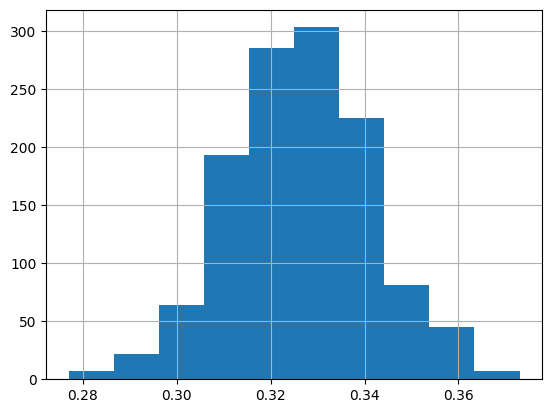

In [55]:
df.OBP.hist();

In [59]:
# Question: What is the mode of OBP during the year 2010 
filter = (df.Year == 2010)
obp_2010 = df[filter].OBP.mode()
print(f"The mode of OBP for the year 2010 is {obp_2010}")

# Question: What is the most common Season Ranking for Boston (BOS)
filter = (df.Team == "BOS")
rs_bos = df[filter].RankSeason.mode()
print(f"The most common Season Ranking for Boston is {rs_bos}")

The mode of OBP for the year 2010 is 0    0.332
Name: OBP, dtype: float64
The most common Season Ranking for Boston is 0    3.0
Name: RankSeason, dtype: float64


<Axes: >

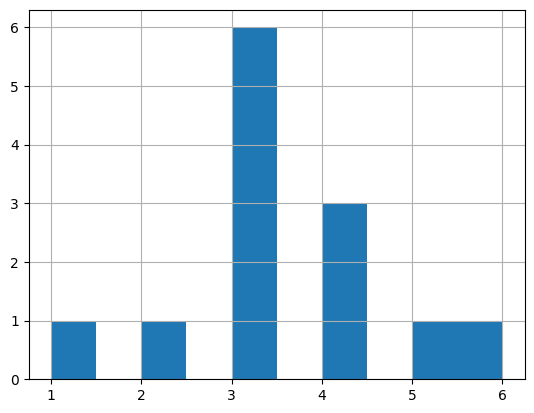

In [63]:
df[filter].RankSeason.hist()

## Standard Deviation and Variance

In [ ]:
# OOBP: mean, std, variance

std_oopb_sample = df.OOBP.std()
std_oopb_population = df.OOBP.std(ddof=False)
mean_oopb = df.OOBP.mean()
variance = df.OOBP.var()

print(f"The mean of the OOBP is {mean_oopb:.2f}")
print(f"The Standard Deviation of the sample for OOBP is {std_oopb_sample:.2f}")
print(f"The Standard Deviation of the population for OOBP is {std_oopb_population:.2f}")
print(f"The variance is {variance:.4f}")

The mean of the OOBP is 0.33
The Standard Deviation of the sample for OOBP is 0.02
The Standard Deviation of the population for OOBP is 0.02
The variance is 0.0002


In [71]:
# What is the std of the sample of BA and the variance of the population of BA ?
std_sample_ba = df.BA.std()
var_pop_ba = df.BA.var(ddof=False)

print(f"The STD of the BA (for the sample) is {std_sample_ba:.2f}")
print(f"The variance of the BA (for the population) is {var_pop_ba:.4f}")

The STD of the BA (for the sample) is 0.01
The variance of the BA (for the population) is 0.0002


## Coefficient of variation: 
$$ C_v = \frac{\sigma}{mean}$$

In [72]:
# Function for descriptive statistics
df.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [77]:
# cv for the 
cv = df.RS.std()/df.RS.mean()
print(f"The CV for RS is {cv:.2f}%")

The CV for RS is 0.13%


In [78]:
# CV for winw
cv_wins = df.W.std()/df.W.mean()
print(f"The CV for W is {cv_wins:.2f}%")

The CV for W is 0.14%


## Covariance

In [79]:
# RS, RA, W
sub_set = df[["RS", "RA", "W"]]

In [82]:
sub_set.head()

,RS,RA,W
0,734,688,81
1,700,600,94
2,712,705,93
3,734,806,69
4,613,759,61


In [83]:
sub_set.cov()

,RS,RA,W
RS,8378.526986,3238.783688,536.724349
RA,3238.783688,8663.873859,-567.810176
W,536.724349,-567.810176,131.288950


In [84]:
# Exercice - Pick 3 variables for the Covariance Matrix

## Correlation

In [85]:
sub_set.corr()

,RS,RA,W
RS,1.000000,0.380139,0.511745
RA,0.380139,1.000000,-0.532394
W,0.511745,-0.532394,1.000000


<Axes: >

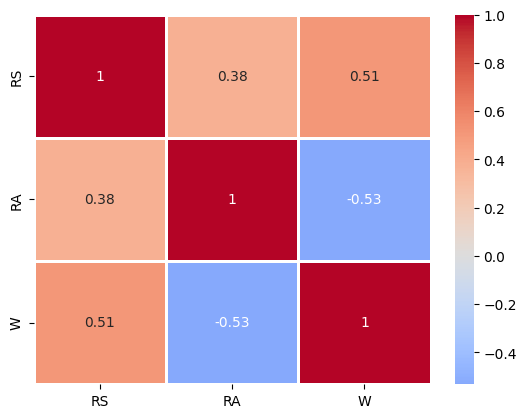

In [89]:
sns.heatmap(sub_set.corr(),
            annot=True,
            center=False,
            cmap="coolwarm",    
            linewidth=True, 
            )

In [90]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [91]:
# Do a correlation matrix, visualize it but change at least 2 parameters
sub_set2 = df[["OBP","RA","SLG"]
              ]

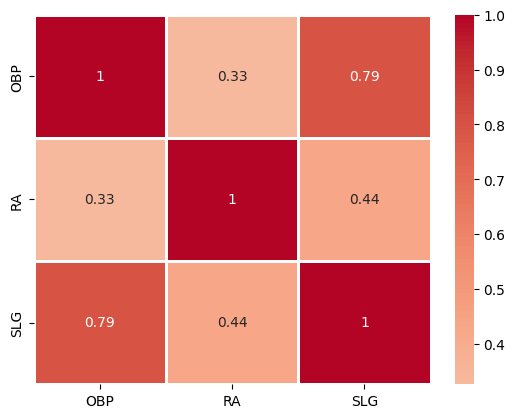

In [95]:
sns.heatmap(sub_set2.corr(),
            annot=True,
            center=False,
            cmap="coolwarm",    
            linewidth=True,
);

## Normal distribution

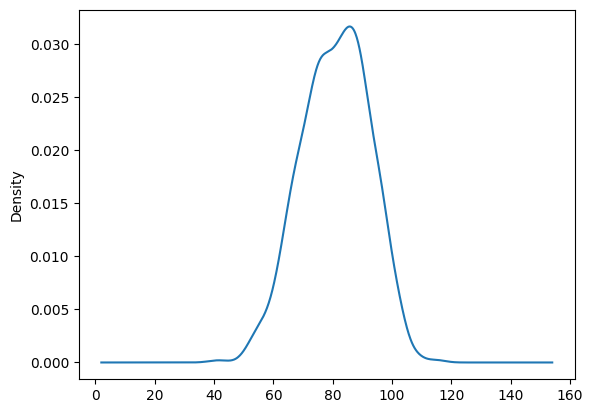

In [108]:
df.W.plot.density();

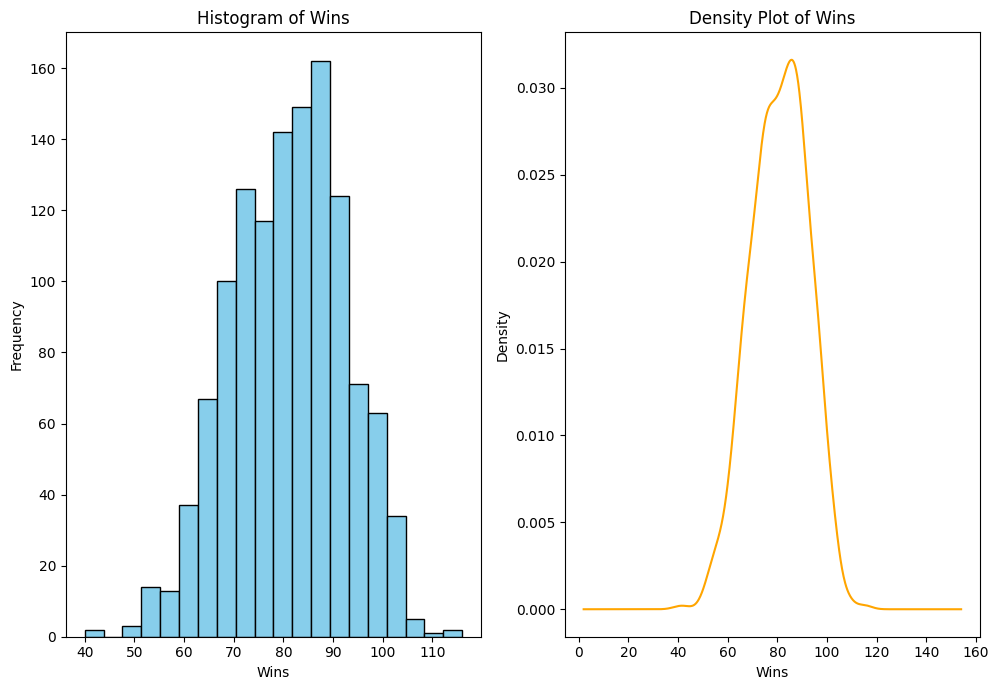

In [110]:
# Plotting Wins
fig, axes = plt.subplots(figsize=(10, 7), nrows=1, ncols=2)

# Histogram of Wins
axes[0].hist(df.W, bins=20, color='skyblue', edgecolor='black')
axes[0].set_title("Histogram of Wins")
axes[0].set_xlabel("Wins")
axes[0].set_ylabel("Frequency")

# Density plot of Wins
df.W.plot(kind='density', ax=axes[1], color='orange')
axes[1].set_title("Density Plot of Wins")
axes[1].set_xlabel("Wins")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [111]:
#68.95-95-99


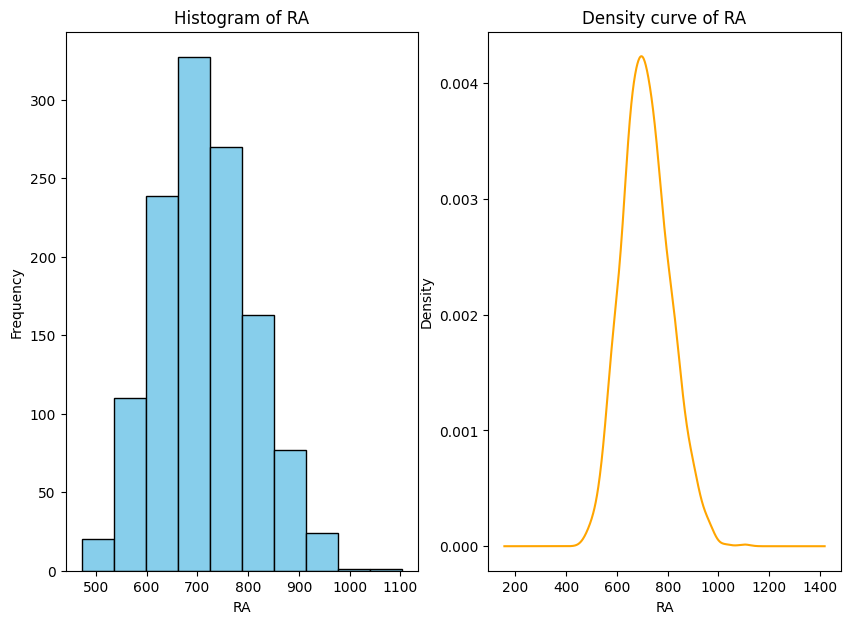

In [124]:
# Density plot for RAs
fig, axes = plt.subplots(figsize=(10,7), ncols=2, nrows=1)
axes[0].hist(df.RA, color="skyblue", edgecolor="black")
axes[0].set_title("Histogram of RA")
axes[0].set_ylabel("Frequency")
axes[0].set_xlabel("RA")

df.RA.plot(kind="density", ax=axes[1], color="orange")
axes[1].set_xlabel("RA")
axes[1].set_ylabel("Density")
axes[1].set_title("Density curve of RA")
plt.show()


In [ ]:
# Exercices - Do the 68-95-99 check but use a for loop ?-> count the %-tage of data at 1, 2, 3 std ()
mean_ra = df.RA.mean()
std_ra = df.RA.std()
for num in range(1,4):
    filter = ((df.RA < mean_ra + num*std_ra) & (df.RA > mean_ra - num*std_ra))
    number = df[filter].RA.count()/df.RA.count()
    print(f"The percentage of element at {num} std from the mean is {number:.2f}%")

The percentage of element at 1 std from the mean is 0.67%
The percentage of element at 2 std from the mean is 0.96%
The percentage of element at 3 std from the mean is 1.00%
